## Examples of running multiway (inverse) covariance models for ensemble Kalman filter

In [1]:
using Plots
using MIRT: jim
using TensorGraphicalModels

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/wayneyw/.julia/packages/Plots/Awg62/src/backends/hdf5.jl", 162, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007fe15a68405f, Ptr{Nothing} @0x00007fe15a71498c, Ptr{Nothing} @0x00007fe15a714ed5, Ptr{Nothing} @0x00007fe15a714b3f, Ptr{Nothing} @0x00007fe15a715543, Ptr{Nothing} @0x00007fe15a7167a7, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007fe15a733a19, Ptr{Nothing} @0x00007fe15a734192, Ptr{Nothing} @0x00007fe15a73357a, Ptr{Nothing} @0x00007fe15a733519, Ptr{Nothing} @0x00007fe15a706205, Ptr{Nothing} @0x00007fe15a734fc1, Ptr{Nothing} @0x00007fe14c163cae, Ptr{Nothing} @0x00007fe10018392e, Ptr{Nothing} @0x00007fe15a6fb727, Ptr{Nothing} @0x00007fe15a714ef5, Ptr{Nothing} @0x00007fe15a714b3f, Ptr{Nothing} @0x00007fe15a715543, Ptr{Nothing} @0x00007fe15a7167a7, Base.InterpreterIP in top-level CodeInfo for Plots at sta

In [2]:
# generate ground truth data 
dynamic_type = "poisson"
obs_type = "linear_perm_miss"
T = 20
N = 50
px = py = (32, 32)
obs_noise = 0.01
process_noise = 0.01
add_process_noise = false
X, Y, H = TensorGraphicalModels.gen_kalmanfilter_data(dynamic_type, obs_type, T, px, py, obs_noise, process_noise, add_process_noise)

([2.919529497137712 -0.01967661007590142 … -0.13109344407790294 0.10134173441709884; -1.1628850234384642 -0.423321592763728 … -0.19071563377916356 0.34149404468175476; … ; 5.176496103883711 1.7064977074491392 … 0.7629583703842027 0.309808213958752; -1.8779387417203202 0.835868465664337 … 0.4273708221287683 0.07960838883058519], [0.00019985533899648396 -4.427051230971314 … 3.1641209553945773 6.129643399076894; 1.4511896391356236 -3.62491113949831 … 1.1750659787035669 1.2378406928398793; … ; 2.361238008915062 -5.706585505887578 … -1.0219739715715774 3.484687408331551; 0.8552548142699102 -2.214300520433958 … 0.8468269012734349 1.189572042994007], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

┌ Info: Saved animation to 
│   fn = /mnt/hdd/Dropbox (University of Michigan)/UMich/Research/Covariance_Estimation/TensorGraphicalModels/examples/tmp.gif
└ @ Plots /home/wayneyw/.julia/packages/Plots/Awg62/src/animation.jl:104


Plots.AnimatedGif("/mnt/hdd/Dropbox (University of Michigan)/UMich/Research/Covariance_Estimation/TensorGraphicalModels/examples/tmp.gif")
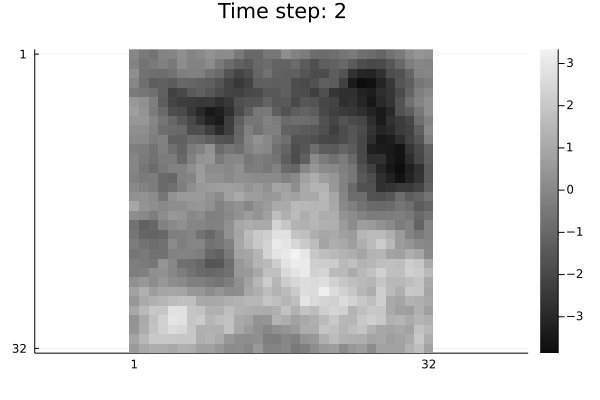

In [3]:
# gif all time steps
anim_x = @animate for i=2:(T+1)
    # plot(jim(reshape(X[:,i],px),clim=(-3.0,3.0)),
    #     title=string("Time step: ",i))
    Plots.plot(jim(reshape(X[:,i],px)),
        title=string("Time step: ",i))
end
gif(anim_x, fps=5)

In [5]:
# run enkf with tensor graphical models
method_list = ["glasso", "kpca", "kglasso", "teralasso", "sg_palm"]
NRMSEs_list = []
# time_list = []
# Omegahat_list = []
for method in method_list
    # starttime = time()
    ## run enkf 
    Xhat, Xhat_bar, _ = enkf(Y, 
                            TensorGraphicalModels.method_str_to_type(method),
                            dynamic_type,
                            H,
                            px,
                            py,
                            N,
                            obs_noise, 
                            process_noise,
                            add_process_noise)
    # ## timer
    # stoptime = time() - starttime
    # push!(time_list, stoptime)
    ## compute NRMSEs
    NRMSEs = TensorGraphicalModels.compute_nrmse(X, Xhat)
    push!(NRMSEs_list, NRMSEs)
    # ## store est. precision/cov matrix
    # push!(Omegahat_list, Omegahat)
end

###### Time step: 1 ######
###### Time step: 2 ######
###### Time step: 3 ######
###### Time step: 4 ######
###### Time step: 5 ######
###### Time step: 6 ######
###### Time step: 7 ######
###### Time step: 8 ######
###### Time step: 9 ######
###### Time step: 10 ######
###### Time step: 11 ######
###### Time step: 12 ######
###### Time step: 13 ######
###### Time step: 14 ######
###### Time step: 15 ######
###### Time step: 16 ######
###### Time step: 17 ######
###### Time step: 18 ######
###### Time step: 19 ######
###### Time step: 20 ######
###### Time step: 1 ######
###### Time step: 2 ######
###### Time step: 3 ######
###### Time step: 4 ######
###### Time step: 5 ######
###### Time step: 6 ######
###### Time step: 7 ######
###### Time step: 8 ######
###### Time step: 9 ######
###### Time step: 10 ######
###### Time step: 11 ######
###### Time step: 12 ######
###### Time step: 13 ######
###### Time step: 14 ######
###### Time step: 15 ######
###### Time step: 16 ######
###### Tim

LoadError: [91mUndefVarError: px not defined[39m

In [ ]:
# set up plots of nrmses
fig = Plots.plot()
xlabel!("Time step")
ylabel!("RMSE")
for method in method_list
    if method == "sg_palm"
        NRMSEs = NRMSEs_list[end] 
    elseif method == "teralasso"
        NRMSEs = NRMSEs_list[4] 
    elseif method == "kglasso"
        NRMSEs = NRMSEs_list[3] 
    elseif method == "glasso"
        NRMSEs = NRMSEs_list[1] 
    elseif method == "kpca"
        NRMSEs = NRMSEs_list[2] 
    end
    ## plot rmse progression for each method
    plot_nrmse!(NRMSEs, method)
end
# plot_nrmse!(NRMSEs_list[1], method_list[1])
display(fig)